In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [6]:
df = pd.read_csv('XBTUSD-5m-data.csv')
prices = df.close

9499.5


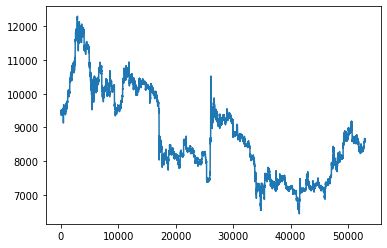

[2.18733075]


In [14]:
plt.plot(prices)
plt.show()

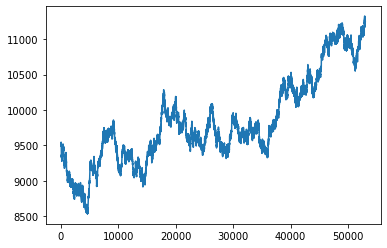

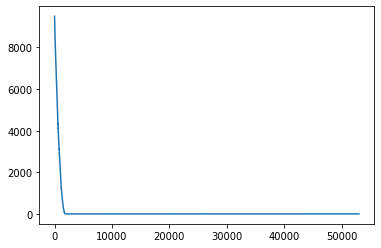

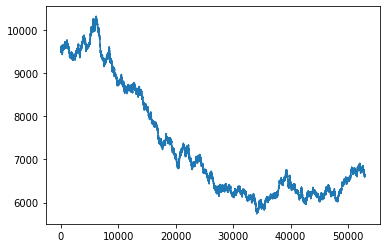

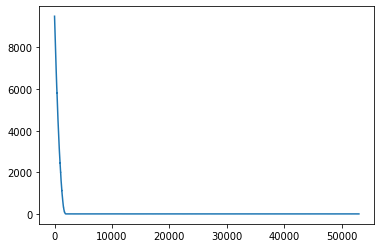

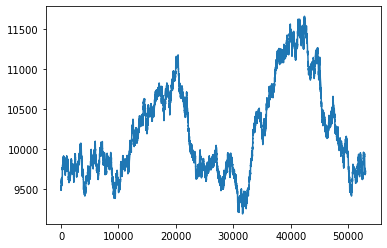

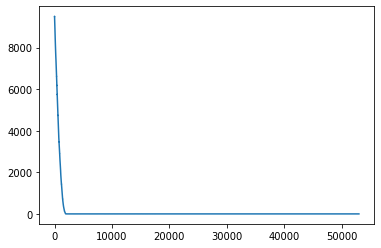

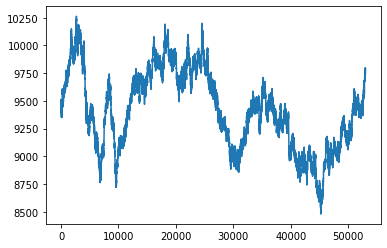

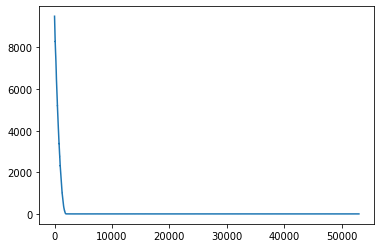

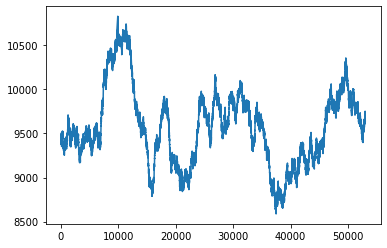

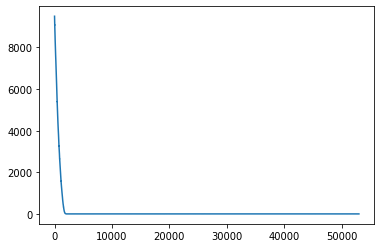

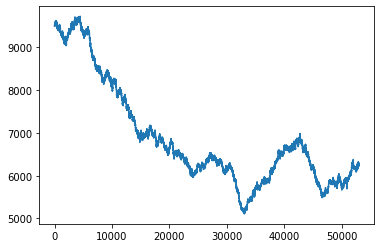

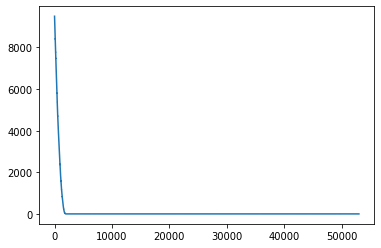

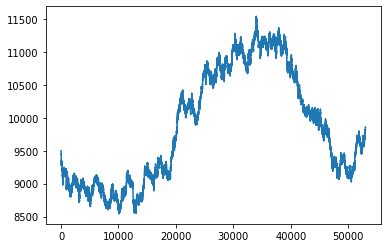

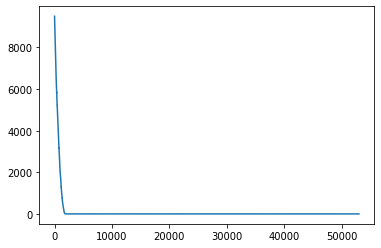

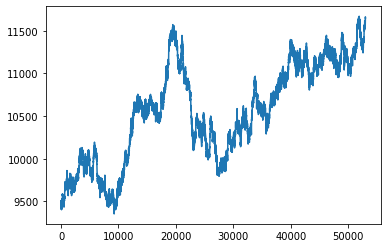

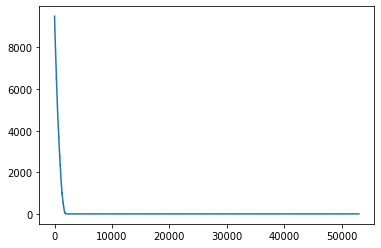

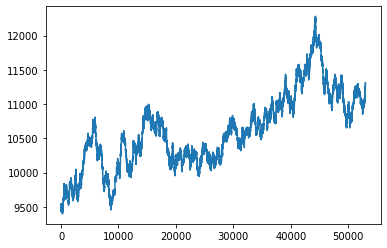

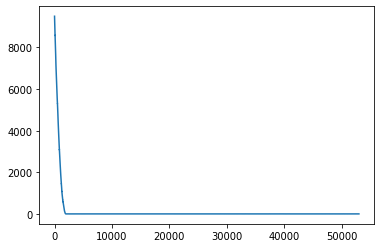

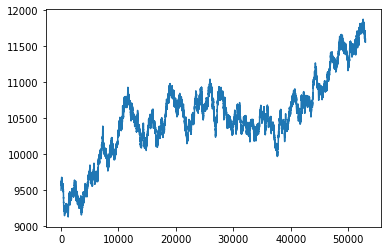

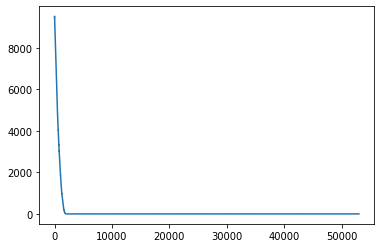

In [36]:
sigma = 59.9631
theta = 10016.3
kappa = 4.44923
s_0 = prices[0]
tau = 1 / (365*24*60)

s = defaultdict()
x = defaultdict()

def s_to_x(s):
    return 2*np.sqrt(s)/sigma

def x_to_s(x):
    return (x**2)*(sigma**2)/4

for j in range(0, 10):
    s[j] = []
    x[j] = []
    s[j].append(s_0)
    x[j].append(s_0)
    for i in range(0, len(prices)):
        x_t = s_to_x(x[j][i])
        dW = np.random.normal(0, np.sqrt(tau), 1)[0]
        dS = kappa*(theta - s[j][i])*tau + sigma*np.sqrt(s[j][i])*dW
        dX = tau*(kappa*(theta - (sigma**2)*(x_t**2)/4)/(sigma**2/2*x_t) - sigma**2/4) + dW
        s[j].append(s[j][i] + dS)
        x[j].append(x_to_s(x_t + dX))
    plt.plot(s[j])
    plt.show()
    plt.plot(x[j])
    plt.show()